In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn import metrics
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#Over Sampling and under sampling libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore");

In [65]:
df = pd.read_csv("30_inj_cyc_e114_deneme.csv")

In [66]:
df.head()

,Unnamed: 0,date,reason,tmpMoldZone25,timCool1,tmpBarrel2Zone3,tmpMoldZone3,tmpBarrel2Zone4,tmpFlange1,tmpMoldZone4,...,timCycle,sfc,frcClamp,timPlasticisation1,timPlasticisation2,prsInjectionHyd1,prsTransferHyd1,strCushion1,strPlasticisation1,strTransfer1
0,12187,2021-01-07T12:56:30.000,[],3276.7,52.02,51.0,214.4,48.2,225.2,220.4,...,80.69,[],4471.8,23.16,24.04,NaN,NaN,NaN,NaN,NaN
1,11578,2021-01-04T21:01:56.000,[],234.9,43.09,230.1,244.8,230.1,251.4,245.0,...,85.30,[],7926.4,5.61,23.90,NaN,NaN,NaN,NaN,NaN
2,11579,2021-01-04T20:52:02.000,[],235.0,43.09,230.0,244.9,230.1,250.5,245.0,...,83.98,[],7928.9,5.58,23.92,NaN,NaN,NaN,NaN,NaN
3,11580,2021-01-04T20:50:38.000,[],235.0,43.09,230.1,244.9,229.9,250.8,245.0,...,86.23,[],7924.4,5.60,23.84,NaN,NaN,NaN,NaN,NaN
4,11581,2021-01-04T20:57:41.000,[],235.0,43.10,230.2,244.9,230.1,249.6,244.9,...,83.91,[],7935.7,5.54,23.91,NaN,NaN,NaN,NaN,NaN


In [67]:
df.describe()

,Unnamed: 0,tmpMoldZone25,timCool1,tmpBarrel2Zone3,tmpMoldZone3,tmpBarrel2Zone4,tmpFlange1,tmpMoldZone4,tmpBarrel2Zone1,tmpFlange2,...,prsInjectionSpec2,timCycle,frcClamp,timPlasticisation1,timPlasticisation2,prsInjectionHyd1,prsTransferHyd1,strCushion1,strPlasticisation1,strTransfer1
count,12188.000000,12187.000000,12188.000000,12187.000000,12188.000000,12187.000000,12188.000000,12188.000000,12187.000000,12187.000000,...,12187.000000,12188.000000,12188.000000,12188.000000,12187.000000,1.00,1.00,1.0,1.0,1.0
mean,6093.500000,1968.801420,47.417215,140.026175,227.542427,131.836802,234.890827,227.677199,143.147846,142.175285,...,1952.543989,83.921674,5988.134222,16.014074,26.969864,66.25,61.51,18.0,111.4,21.0
std,3518.516875,1505.753232,6.719384,89.091533,18.112994,86.857839,14.062323,18.198892,90.390063,91.341661,...,6.045149,82.582582,1799.227503,9.553211,4.879069,NaN,NaN,NaN,NaN,NaN
min,0.000000,224.700000,0.000000,43.700000,208.600000,40.100000,70.000000,209.000000,45.100000,44.500000,...,1884.900000,0.000000,4139.500000,1.730000,3.400000,66.25,61.51,18.0,111.4,21.0
25%,3046.750000,235.000000,44.020000,47.600000,210.000000,44.000000,224.900000,210.000000,49.500000,48.700000,...,1945.700000,79.570000,4449.200000,5.880000,23.990000,66.25,61.51,18.0,111.4,21.0
50%,6093.500000,3276.700000,50.030000,184.200000,215.000000,139.200000,225.600000,215.000000,182.800000,161.000000,...,1953.100000,80.140000,4501.400000,23.100000,24.040000,66.25,61.51,18.0,111.4,21.0
75%,9140.250000,3276.700000,52.020000,230.100000,244.825000,229.700000,250.400000,245.000000,235.000000,235.300000,...,1958.600000,83.880000,7940.900000,23.300000,34.700000,66.25,61.51,18.0,111.4,21.0
max,12187.000000,3276.700000,427.240000,231.300000,258.000000,232.000000,254.900000,258.100000,235.800000,236.700000,...,1974.500000,8307.960000,16000.000000,400.730000,49.400000,66.25,61.51,18.0,111.4,21.0


In [68]:
df['reason'] = df['reason'].replace(['[]'],0)
df['reason'][df['reason'] != 0] = 1

In [69]:
df = df.astype({"reason": int})

In [70]:
df.columns

Index(['Unnamed: 0', 'date', 'reason', 'tmpMoldZone25', 'timCool1',
       'tmpBarrel2Zone3', 'tmpMoldZone3', 'tmpBarrel2Zone4', 'tmpFlange1',
       'tmpMoldZone4', 'tmpBarrel2Zone1', 'tmpFlange2', 'tmpMoldZone1',
       'volCushion1', 'tmpBarrel2Zone2', 'tmpMoldZone2', 'volCushion2',
       'prsBackSpec2', 'prsBackSpec1', 'spdInjection1', 'tmpMoldZone9',
       'spdInjection2', 'tmpMoldZone7', 'tmpMoldZone8', 'tmpOil',
       'tmpMoldZone5', 'tmpMoldZone6', 'tmpMoldZone19', 'cntCycle',
       'tmpMoldZone18', 'volTransfer2', 'stsMachine', 'tmpMoldZone15',
       'volTransfer1', 'tmpMoldZone14', 'tmpMoldZone17', 'tmpMoldZone16',
       'timTransfer2', 'timTransfer1', 'velPlasticisation2',
       'velPlasticisation1', 'timMoldClose', 'tmpBarrel1Zone5',
       'tmpMoldZone22', 'tmpBarrel1Zone4', 'tmpMoldZone21', 'tmpMoldZone24',
       'tmpBarrel1Zone6', 'tmpMoldZone23', 'prsPomp1', 'tmpBarrel1Zone1',
       'prsPomp2', 'tmpBarrel1Zone3', 'tmpMoldZone20', 'tmpBarrel1Zone2',
       'volS

In [71]:
drop_list = ['Unnamed: 0', 'date', 'cntCycle','stsMachine','timestamp','sfc','decMold','prsInjectionHyd1','prsTransferHyd1','strCushion1','strPlasticisation1','strTransfer1']

In [72]:
df2 = df.drop(drop_list, axis=1)

In [73]:
df2 = df2.drop('spdInjection1', axis=1)

In [74]:
df2 = df2.dropna()

In [75]:
df2.head()

,reason,tmpMoldZone25,timCool1,tmpBarrel2Zone3,tmpMoldZone3,tmpBarrel2Zone4,tmpFlange1,tmpMoldZone4,tmpBarrel2Zone1,tmpFlange2,...,prsHoldSpec1,tmpNozle1,prsTransferSpec2,prsTransferSpec1,prsInjectionSpec1,prsInjectionSpec2,timCycle,frcClamp,timPlasticisation1,timPlasticisation2
0,0,3276.7,52.02,51.0,214.4,48.2,225.2,220.4,52.1,50.1,...,1114.3,212.8,1953.1,1119.7,1468.0,1959.9,80.69,4471.8,23.16,24.04
1,0,234.9,43.09,230.1,244.8,230.1,251.4,245.0,235.1,235.6,...,1229.1,251.3,1951.6,1247.2,1247.2,1953.0,85.30,7926.4,5.61,23.90
2,0,235.0,43.09,230.0,244.9,230.1,250.5,245.0,235.0,235.6,...,1227.7,252.5,1951.1,1240.0,1240.0,1953.1,83.98,7928.9,5.58,23.92
3,0,235.0,43.09,230.1,244.9,229.9,250.8,245.0,235.0,235.2,...,1228.2,248.8,1950.8,1246.8,1246.8,1952.6,86.23,7924.4,5.60,23.84
4,0,235.0,43.10,230.2,244.9,230.1,249.6,244.9,235.0,235.7,...,1233.8,253.2,1952.4,1238.7,1238.7,1954.1,83.91,7935.7,5.54,23.91


In [76]:
df2['reason'].value_counts()

0    11732
1      455
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='count'>

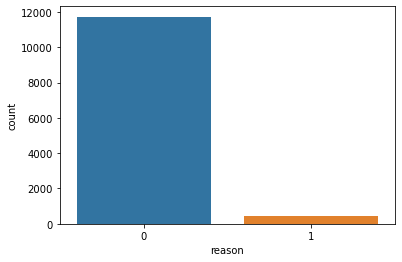

In [77]:
sns.countplot(x='reason',data=df2)

<AxesSubplot:>

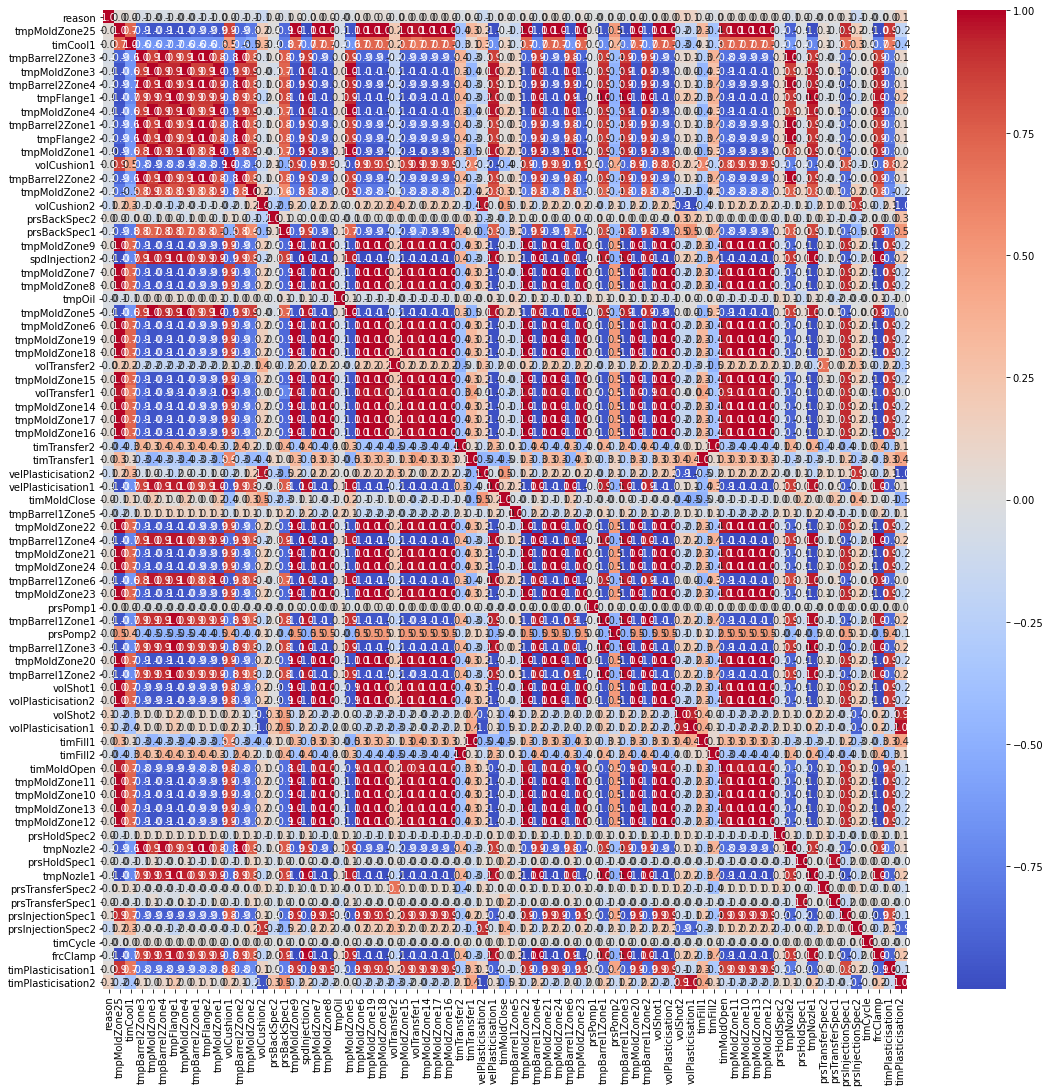

In [78]:
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df2.corr(),annot=True,cmap='coolwarm', fmt='.1f')

In [84]:
#Class count
count_class_0, count_class_1 = df2.reason.value_counts()
#Divide by class
df_class_0 = df2[df2['reason'] == 0]
df_class_1 = df2[df2['reason'] == 1]

In [85]:
#Random Under-Sampling

In [86]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
print('Random under-sampling:')
print(df_test_under.reason.value_counts())

Random under-sampling:
1    455
0    455
Name: reason, dtype: int64


In [87]:
y = df_test_under['reason']
X = df_test_under.drop(['reason'], axis=1)

In [88]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,0.792404,0.770099,1.064718,-0.579551,0.451016,-0.745568,-0.581738,1.014561,1.027402,-0.469082,...,-0.891135,-0.679445,1.290459,-0.953338,0.294441,1.441336,-0.123189,-0.829665,0.396059,-0.925996
1,0.792404,0.817435,-0.918904,-0.833843,-0.898725,-0.699665,-0.835063,-0.912299,-0.890304,-0.745757,...,-1.202110,-0.722948,0.693717,-1.130958,1.080927,0.452373,-0.175750,-0.755308,0.405897,-0.872639
2,-1.262486,-0.697293,1.180325,0.972150,1.258327,1.327734,0.969230,1.183485,1.189619,0.936880,...,0.116968,1.191203,1.132498,0.077509,-1.140240,0.844819,0.222499,1.201095,-0.743835,-0.865280
3,0.792404,0.736018,-0.912037,-0.839033,-0.883753,-0.653762,-0.840233,-0.908920,-0.883637,-0.757050,...,-1.118386,-0.732616,-1.043855,-1.055530,1.115008,-1.117409,-0.214159,-0.771437,0.384254,1.129174
4,-1.255730,-1.854166,1.179180,0.951391,1.142010,1.197674,0.969230,1.184611,1.190730,0.903001,...,-0.114554,1.365216,-1.324674,-0.059559,-1.231341,-0.709265,-0.304119,1.320697,-0.667099,1.167812


In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Confusion Matrix:
 [[71 27]
 [14 70]]
Accuracy:
 0.7747252747252747
Precision:
 0.7216494845360825
Recall:
 0.8333333333333334
AUC:
 0.8245869776482021


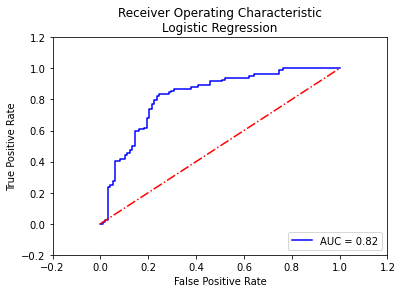

In [21]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_logreg=logreg.predict(X_val)
y_logreg_prob=logreg.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_logreg))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_logreg))
print("Precision:\n",metrics.precision_score(y_val,y_logreg))
print("Recall:\n",metrics.recall_score(y_val,y_logreg))
print("AUC:\n",metrics.roc_auc_score(y_val,y_logreg_prob))
auc=metrics.roc_auc_score(y_val,y_logreg_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_logreg_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

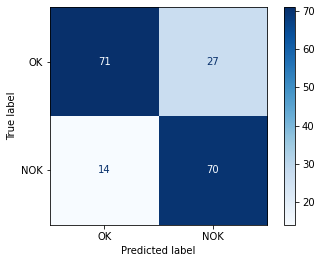

In [22]:
cm = metrics.confusion_matrix(y_val,y_logreg)
classNames = ['OK','NOK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

Confusion Matrix:
 [[76 22]
 [12 72]]
Accuracy:
 0.8131868131868132
Precision:
 0.7659574468085106
Recall:
 0.8571428571428571
AUC:
 0.8779761904761904


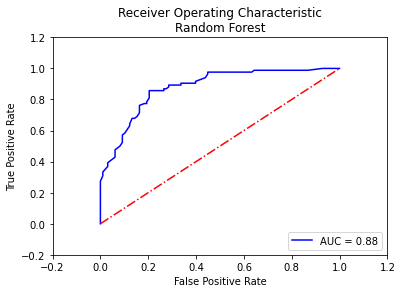

In [23]:
#Random Forest with 'entropy' criterion
from sklearn.ensemble import RandomForestClassifier

rf2=RandomForestClassifier(criterion='entropy',random_state=3)
rf2.fit(X_train,y_train)
y_rf2=rf2.predict(X_val)
y_rf_prob2=rf2.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_rf2))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_rf2))
print("Precision:\n",metrics.precision_score(y_val,y_rf2))
print("Recall:\n",metrics.recall_score(y_val,y_rf2))
print("AUC:\n",metrics.roc_auc_score(y_val,y_rf_prob2))
auc=metrics.roc_auc_score(y_val,y_rf_prob2)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_rf_prob2)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

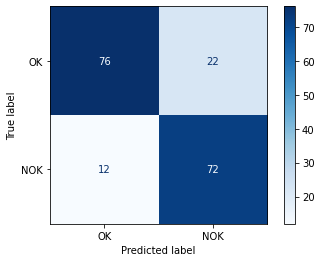

In [24]:
cm = metrics.confusion_matrix(y_val,y_rf2)
classNames = ['OK','NOK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

Confusion Matrix:
 [[76 22]
 [14 70]]
Accuracy:
 0.8021978021978022
Precision:
 0.7608695652173914
Recall:
 0.8333333333333334
AUC:
 0.873117103984451


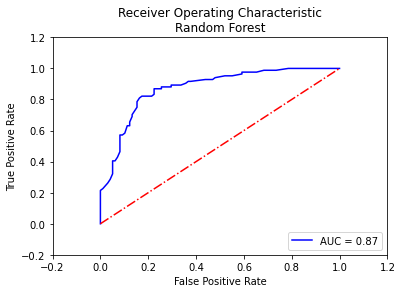

In [25]:
#Random Forest with 'gini' criterion
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=3)
rf.fit(X_train,y_train)
y_rf=rf.predict(X_val)
y_rf_prob=rf.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_rf))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_rf))
print("Precision:\n",metrics.precision_score(y_val,y_rf))
print("Recall:\n",metrics.recall_score(y_val,y_rf))
print("AUC:\n",metrics.roc_auc_score(y_val,y_rf_prob))
auc=metrics.roc_auc_score(y_val,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

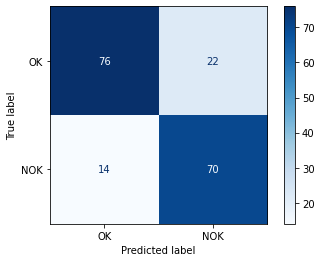

In [26]:
cm = metrics.confusion_matrix(y_val,y_rf)
classNames = ['OK','NOK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

In [27]:
y_smote = df2['reason']
X_smote = df2.drop(['reason'], axis=1)

In [28]:
scaler = preprocessing.StandardScaler().fit(X_smote)
X_smote = scaler.transform(X_smote)
X_smote = pd.DataFrame(X_smote)
X_smote.head()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,0.868637,0.685286,-0.999307,-0.725619,-0.962955,-0.694023,-0.399908,-1.007318,-1.008073,-0.566716,...,-0.973679,-0.616483,0.118685,-1.002586,0.401030,1.216895,-0.039161,-0.843385,0.747972,-0.600521
1,-1.151565,-0.645049,1.011067,0.952746,1.131357,1.179712,0.951833,1.017323,1.022847,0.934102,...,0.047539,1.149293,0.084340,0.099472,-1.033235,0.075437,0.016662,1.079105,-1.089141,-0.629216
2,-1.151498,-0.645049,1.009945,0.958267,1.131357,1.115347,0.951833,1.016217,1.022847,0.934102,...,0.035085,1.204331,0.072891,0.037238,-1.080004,0.091980,0.000678,1.080496,-1.092281,-0.625117
3,-1.151498,-0.645049,1.011067,0.958267,1.129054,1.136802,0.951833,1.016217,1.018468,0.934102,...,0.039533,1.034633,0.066022,0.096014,-1.035833,0.009266,0.027924,1.077992,-1.090187,-0.641514
4,-1.151498,-0.643559,1.012190,0.958267,1.131357,1.050982,0.946338,1.016217,1.023942,0.934102,...,0.089348,1.236436,0.102657,0.026001,-1.088449,0.257409,-0.000170,1.084281,-1.096468,-0.627167


In [29]:
X_train, X_val, y_train, y_val = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, shuffle=True)

In [30]:
sm=SMOTE(random_state=2)
X_sm,y_sm=sm.fit_resample(X_train,y_train)
print(X_sm.shape,y_sm.shape)
print(len(y_sm[y_sm==1]),len(y_sm[y_sm==0]))

(18740, 73) (18740,)
9370 9370


In [31]:
y_val.value_counts()

0    2362
1      76
Name: reason, dtype: int64

Confusion Matrix:
 [[1843  519]
 [  14   62]]
Accuracy:
 0.7813781788351107
Precision:
 0.10671256454388985
Recall:
 0.8157894736842105
AUC:
 0.8645828691118144


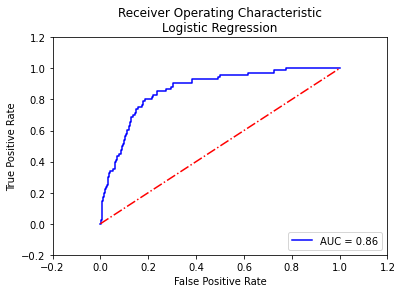

In [32]:
logreg=LogisticRegression()
logreg.fit(X_sm,y_sm)
y_logreg=logreg.predict(X_val)
y_logreg_prob=logreg.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_logreg))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_logreg))
print("Precision:\n",metrics.precision_score(y_val,y_logreg))
print("Recall:\n",metrics.recall_score(y_val,y_logreg))
print("AUC:\n",metrics.roc_auc_score(y_val,y_logreg_prob))
auc=metrics.roc_auc_score(y_val,y_logreg_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_logreg_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
threshold = 0.5

In [34]:
y_logreg_prob = logreg.predict_proba(X_val)[:,1]

In [35]:
prob_thresh = (y_logreg_prob>=threshold).astype('int')

In [36]:
CM_2_Thresh = confusion_matrix(y_val,prob_thresh)
CM_2_Thresh

array([[1843,  519],
       [  14,   62]], dtype=int64)

Confusion Matrix:
 [[2341   21]
 [  59   17]]
Accuracy:
 0.9671862182116489
Precision:
 0.4473684210526316
Recall:
 0.2236842105263158
AUC:
 0.9050592718035564


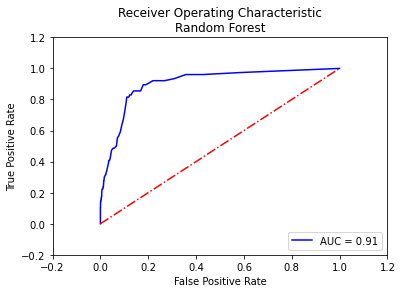

In [37]:
#Random Forest with 'entropy' criterion
from sklearn.ensemble import RandomForestClassifier

rf2=RandomForestClassifier(criterion='entropy',random_state=3)
rf2.fit(X_sm,y_sm)
y_rf2=rf2.predict(X_val)
y_rf_prob2=rf2.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_rf2))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_rf2))
print("Precision:\n",metrics.precision_score(y_val,y_rf2))
print("Recall:\n",metrics.recall_score(y_val,y_rf2))
print("AUC:\n",metrics.roc_auc_score(y_val,y_rf_prob2))
auc=metrics.roc_auc_score(y_val,y_rf_prob2)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_rf_prob2)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix:
 [[2334   28]
 [  59   17]]
Accuracy:
 0.9643150123051681
Precision:
 0.37777777777777777
Recall:
 0.2236842105263158
AUC:
 0.9044158607781095


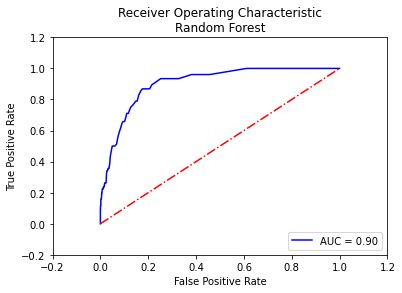

In [38]:
#Random Forest with 'gini' criterion
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=3)
rf.fit(X_sm,y_sm)
y_rf=rf.predict(X_val)
y_rf_prob=rf.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_rf))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_rf))
print("Precision:\n",metrics.precision_score(y_val,y_rf))
print("Recall:\n",metrics.recall_score(y_val,y_rf))
print("AUC:\n",metrics.roc_auc_score(y_val,y_rf_prob))
auc=metrics.roc_auc_score(y_val,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [56]:
df2.to_csv('Without reason/injection_data.csv')

In [61]:
df2.columns

Index(['reason', 'tmpMoldZone25', 'timCool1', 'tmpBarrel2Zone3',
       'tmpMoldZone3', 'tmpBarrel2Zone4', 'tmpFlange1', 'tmpMoldZone4',
       'tmpBarrel2Zone1', 'tmpFlange2', 'tmpMoldZone1', 'volCushion1',
       'tmpBarrel2Zone2', 'tmpMoldZone2', 'volCushion2', 'prsBackSpec2',
       'prsBackSpec1', 'tmpMoldZone9', 'spdInjection2', 'tmpMoldZone7',
       'tmpMoldZone8', 'tmpOil', 'tmpMoldZone5', 'tmpMoldZone6',
       'tmpMoldZone19', 'tmpMoldZone18', 'volTransfer2', 'tmpMoldZone15',
       'volTransfer1', 'tmpMoldZone14', 'tmpMoldZone17', 'tmpMoldZone16',
       'timTransfer2', 'timTransfer1', 'velPlasticisation2',
       'velPlasticisation1', 'timMoldClose', 'tmpBarrel1Zone5',
       'tmpMoldZone22', 'tmpBarrel1Zone4', 'tmpMoldZone21', 'tmpMoldZone24',
       'tmpBarrel1Zone6', 'tmpMoldZone23', 'prsPomp1', 'tmpBarrel1Zone1',
       'prsPomp2', 'tmpBarrel1Zone3', 'tmpMoldZone20', 'tmpBarrel1Zone2',
       'volShot1', 'volPlasticisation2', 'volShot2', 'volPlasticisation1',
       't

In [91]:
df_save = df_test_under.sample(frac=1)

In [95]:
df_save.to_csv('Without reason/injection__val_data2.csv')

In [94]:
df_save

,reason,tmpMoldZone25,timCool1,tmpBarrel2Zone3,tmpMoldZone3,tmpBarrel2Zone4,tmpFlange1,tmpMoldZone4,tmpBarrel2Zone1,tmpFlange2,...,prsHoldSpec1,tmpNozle1,prsTransferSpec2,prsTransferSpec1,prsInjectionSpec1,prsInjectionSpec2,timCycle,frcClamp,timPlasticisation1,timPlasticisation2
1632,1,235.0,43.52,230.2,254.9,230.1,251.3,255.0,235.0,235.4,...,1233.9,249.5,1949.8,1255.1,1255.1,1952.2,84.04,7954.6,5.81,23.85
1440,1,3276.7,50.03,77.5,209.6,60.7,225.2,209.2,80.7,67.2,...,1083.8,209.6,1941.0,1085.7,1471.1,1943.1,80.18,4489.3,22.81,34.91
7672,1,235.0,27.53,231.0,254.9,229.8,249.9,255.0,235.1,235.5,...,1251.4,250.6,1951.1,1267.0,1267.0,1953.3,154.65,7932.5,5.75,25.51
7703,1,235.0,44.02,230.2,254.8,230.1,251.0,255.0,235.0,234.8,...,1247.6,252.1,1946.9,1255.8,1255.8,1958.6,84.21,7948.5,5.78,24.26
7185,1,225.0,38.30,230.1,234.4,220.0,250.9,234.9,235.0,235.3,...,1218.2,248.7,1940.6,1233.5,1234.6,1943.3,80.14,9126.3,7.13,34.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,0,3276.7,51.38,53.4,214.9,50.3,224.7,215.0,54.9,51.7,...,1408.0,210.3,1953.1,1428.8,1491.8,1959.9,80.31,4508.3,23.15,24.04
7730,0,235.0,44.02,230.2,254.9,230.0,252.3,255.0,235.0,235.4,...,1236.6,250.8,1952.3,1249.4,1249.4,1955.3,84.72,7928.9,5.80,24.19
629,0,3276.7,52.02,49.8,215.0,44.7,225.0,215.0,51.1,50.6,...,1190.9,209.9,1953.3,1212.6,1480.4,1958.8,80.59,4492.6,23.38,24.04
3822,1,3276.7,52.02,109.7,209.9,90.7,225.5,209.7,110.0,89.8,...,1138.9,210.3,1950.9,1145.4,1584.5,1953.1,79.79,4447.8,23.25,24.03
